<a href="https://colab.research.google.com/github/hebaashraf21/KNN_K-means_PCA_CUDA_Implementation/blob/main/knn/knn_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def knn_without_cuda(reference_points, query_points, k):
    results = []
    for query_point in query_points:
        distances = np.linalg.norm(reference_points - query_point, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        results.append(nearest_indices)
    return results

In [32]:
# Function to measure time for non-CUDA implementation
def measure_time(reference_size, query_size, k,dim):
    reference_points = np.random.rand(reference_size, dim)
    query_points = np.random.rand(query_size, dim)
    start_time = time.time()
    knn_without_cuda(reference_points, query_points, k)
    end_time = time.time()
    return end_time - start_time

Time taken with reference size 100 and query size 10: 0.0004 seconds
Time taken with reference size 1000 and query size 100: 0.0172 seconds
Time taken with reference size 10000 and query size 1000: 1.8612 seconds
Time taken with reference size 50000 and query size 5000: 30.3470 seconds
Time taken with reference size 100000 and query size 10000: 129.8807 seconds


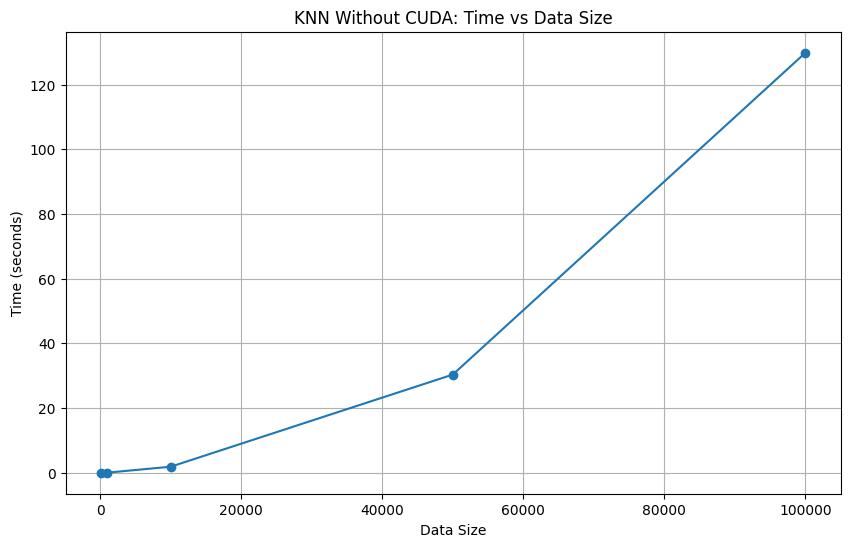

In [33]:
# Define different sizes for reference and query points
sizes = [100, 1000, 10000, 50000, 100000]
times = []

# Measure time for each size
for size in sizes:
    time_taken = measure_time(size, size // 10, 5,3)
    times.append(time_taken)
    print(f"Time taken with reference size {size} and query size {size // 10}: {time_taken:.4f} seconds")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title('KNN Without CUDA: Time vs Data Size')
plt.xlabel('Data Size')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()